In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

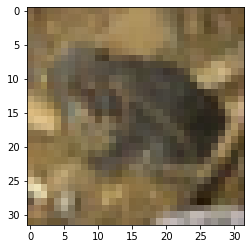

In [ ]:
plt.imshow(x_train[23])

In [ ]:
x_train[0].max()

255

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train,10)

In [ ]:
y_cat_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",patience=2)

In [ ]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 53s 33ms/step - loss: 1.4684 - accuracy: 0.4676 - val_loss: 1.2704 - val_accuracy: 0.5414
Epoch 2/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1414 - accuracy: 0.5985 - val_loss: 1.1015 - val_accuracy: 0.6153
Epoch 3/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9821 - accuracy: 0.6566 - val_loss: 1.0567 - val_accuracy: 0.6362
Epoch 4/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8724 - accuracy: 0.6943 - val_loss: 0.9761 - val_accuracy: 0.6626
Epoch 5/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7716 - accuracy: 0.7305 - val_loss: 0.9687 - val_accuracy: 0.6755
Epoch 6/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6885 - accuracy: 0.7589 - val_loss: 0.9709 - val_accuracy: 0.6708
Epoch 7/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6097 - accuracy: 0.7852 - val_loss: 1.0001 -

In [ ]:
metrics = pd.DataFrame(model.history.history)

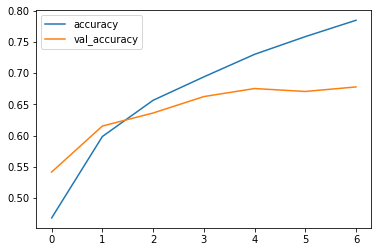

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

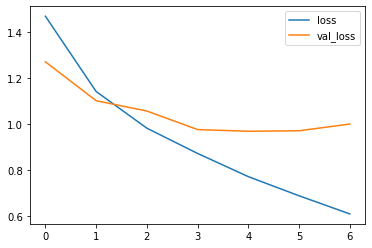

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.0001 - accuracy: 0.6781


[1.0001084804534912, 0.6780999898910522]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 3s 11ms/step


In [ ]:
for p in predictions:
  for j in range(len(p)):
    if p[j] == p.max():
      p[j] = 1
    else:
      p[j] = 0

In [ ]:
predictions[:20]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71      1000
           1       0.75      0.84      0.79      1000
           2       0.58      0.53      0.55      1000
           3       0.51      0.46      0.48      1000
           4       0.61      0.63      0.62      1000
           5       0.59      0.54      0.56      1000
           6       0.71      0.80      0.75      1000
           7       0.73      0.74      0.73      1000
           8       0.72      0.85      0.78      1000
           9       0.75      0.75      0.75      1000

   micro avg       0.68      0.68      0.68     10000
   macro avg       0.67      0.68      0.67     10000
weighted avg       0.67      0.68      0.67     10000
 samples avg       0.68      0.68      0.68     10000

